<a href="https://colab.research.google.com/github/RikiRk/McDonald-Market-Segmentation/blob/main/Mcdonald_Market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"

df = pd.read_csv(url)
print("Number of data points: ",len(df))

Number of data points:  1453


In [4]:
df.head(25)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [5]:
df.describe()


,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
df.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
df.dropna()
print("After Drop or  removing data point we have: ",len(df))

After Drop or  removing data point we have:  1453


In [9]:
df["Gender"].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

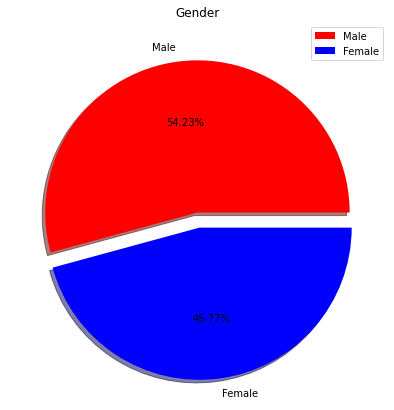

In [10]:

labels = ["Male", "Female"]
size = df["Gender"].value_counts()
color = ["Red", "blue"]
explode = [0, 0.1]
plt.rcParams["figure.figsize"] = (7,7)
plt.pie(size, colors=color, explode=explode, labels=labels, shadow= True, autopct= "%.2f%%", frame= False)
plt.title("Gender")
plt.legend()
plt.axis(True)
plt.show()

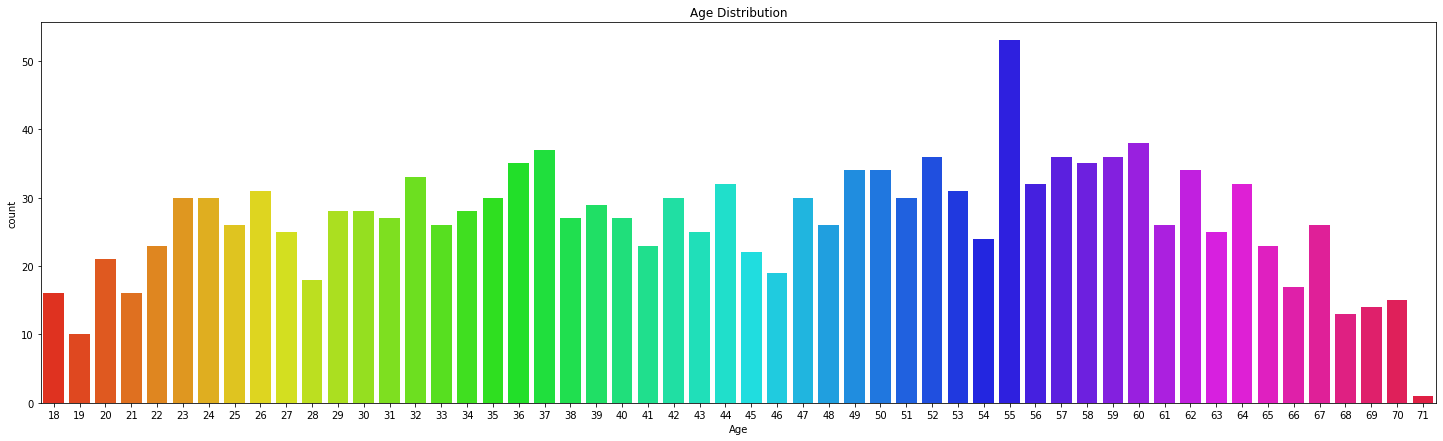

In [11]:
plt.rcParams["figure.figsize"] = (25,7)
f = sns.countplot(x = df["Age"],palette="hsv")
plt.title("Age Distribution")
plt.show()

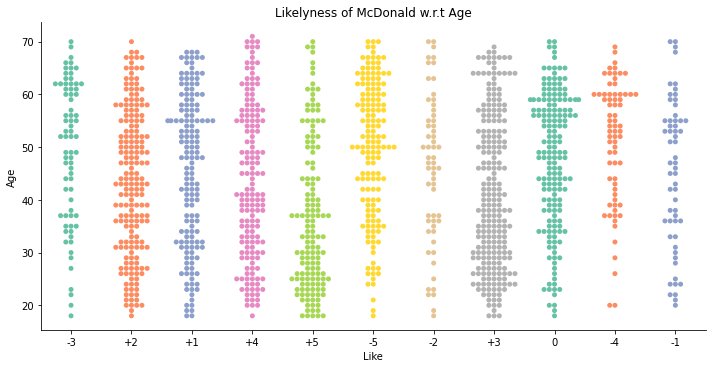

In [12]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [13]:
df["Like"]

0       -3
1       +2
2       +1
3       +4
4       +2
        ..
1448    -5
1449    +2
1450    +3
1451    +4
1452    -3
Name: Like, Length: 1453, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


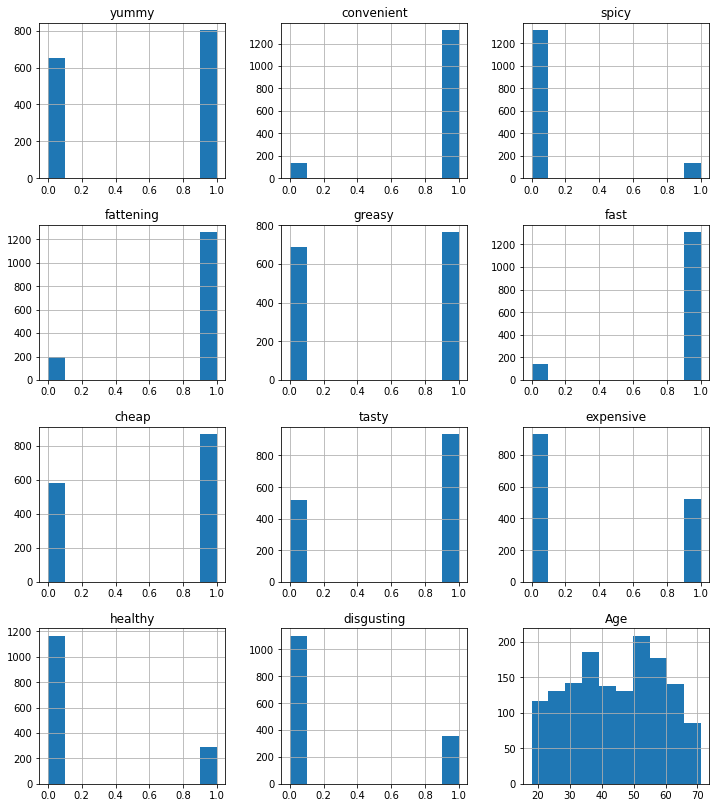

In [15]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [16]:
x = df.loc[:,cat].values
x


array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])